In [69]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [70]:
!kaggle datasets download bhavikjikadara/dog-and-cat-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset
License(s): apache-2.0
dog-and-cat-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [71]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dog-and-cat-classification-dataset.zip","r")
zip_ref.extractall("/content")
zip_ref.close()

In [72]:
import tensorflow as tensorflow
from tensorflow import keras
from keras import Sequential
from keras .layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization

In [73]:
import os
import glob

# Define the source directory containing the Cat and Dog folders
source_dir = '/content/PetImages'

# Get the list of all image file paths for cats and dogs using glob
cat_image_paths = glob.glob(os.path.join(source_dir, 'Cat', '*'))
dog_image_paths = glob.glob(os.path.join(source_dir, 'Dog', '*'))

print(f"Found {len(cat_image_paths)} cat images and {len(dog_image_paths)} dog images.")

Found 12499 cat images and 12499 dog images.


In [83]:
from sklearn.model_selection import train_test_split

# Combine cat and dog image paths and create corresponding labels (0 for cats, 1 for dogs)
all_image_paths = cat_image_paths + dog_image_paths
labels = [0] * len(cat_image_paths) + [1] * len(dog_image_paths)

# Split the data into training and testing sets (80% train, 20% test)
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(
    all_image_paths, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"Training set: {len(train_image_paths)} images")
print(f"Testing set: {len(test_image_paths)} images")

Training set: 2000 images
Testing set: 1000 images


In [84]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Create DataFrames from image paths and labels
train_df = pd.DataFrame({'filename': train_image_paths, 'class': train_labels})
test_df = pd.DataFrame({'filename': test_image_paths, 'class': test_labels})

# Convert labels to string type for flow_from_dataframe
train_df['class'] = train_df['class'].astype(str)
test_df['class'] = test_df['class'].astype(str)

# Create data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1./255) # Rescale pixel values to be between 0 and 1
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='class',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

Found 2000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


#genratoros

train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/PetImages",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)


Validation_ds = keras.utils.image_dataset_from_directory(
    directory="/content/PetImages",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)
#Normlaize
def process(image,label):
   image = tf.cast(image/255,tf.float32)
   return image,label

   train_ds train_ds.map(process)
   validation_ds = validation_ds.map(process)

In [85]:
#create cnn mmodel
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding ="valid",activation = "relu",input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2 ,padding = "valid"))

model.add(Conv2D(64,kernel_size = (3,3),padding ="valid",activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2 ,padding = "valid"))

model.add(Conv2D(64,kernel_size = (3,3),padding ="valid",activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 3 ,padding = "valid"))

model.add(Flatten())
model.add(Dense(128,activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,342,209 (12.75 MB)

 Trainable params: 3,341,889 (12.75 MB)

 Non-trainable params: 320 (1.25 KB)

In [87]:
model.compile(optimizer="adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [88]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_generator,#train_augmented_generator,
    epochs=2,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/2


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 450s 7s/step - accuracy: 0.5747 - loss: 1.4955 - val_accuracy: 0.4830 - val_loss: 3.2292
Epoch 2/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 453s 7s/step - accuracy: 0.6722 - loss: 0.7361 - val_accuracy: 0.5060 - val_loss: 1.3527


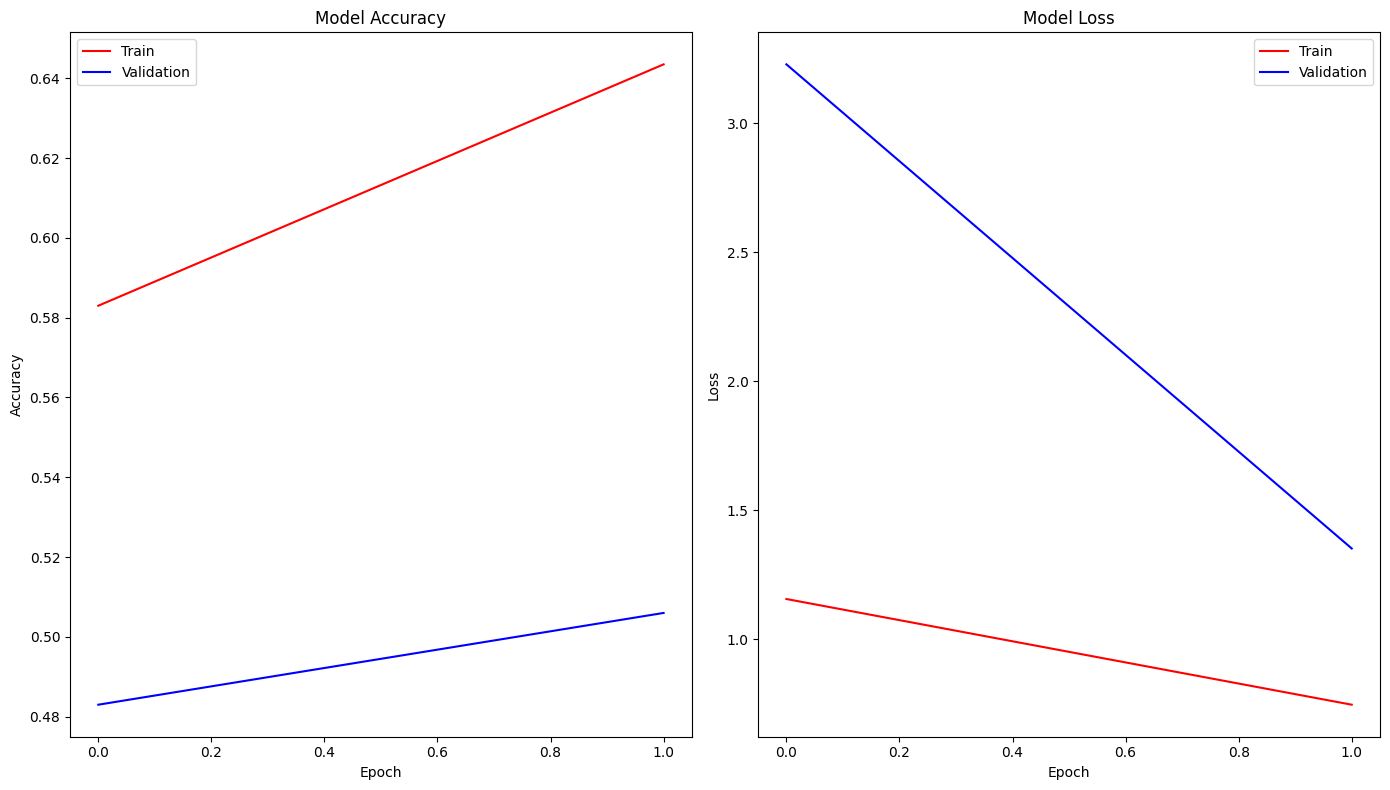

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='red', label='Train')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='red', label='Train')
plt.plot(history.history['val_loss'], color='blue', label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [90]:
import cv2

In [91]:
import random
# Select a random image path from the test set
random_test_image_path = random.choice(test_image_paths)
test_img = cv2.imread(random_test_image_path)

# Check if the image was loaded successfully
if test_img is None:
    print(f"Error: Could not load image from {random_test_image_path}")
else:
    print(f"Loaded image from: {random_test_image_path}")

Loaded image from: /content/PetImages/Cat/1040.jpg


In [92]:
test_img.shape

(431, 463, 3)

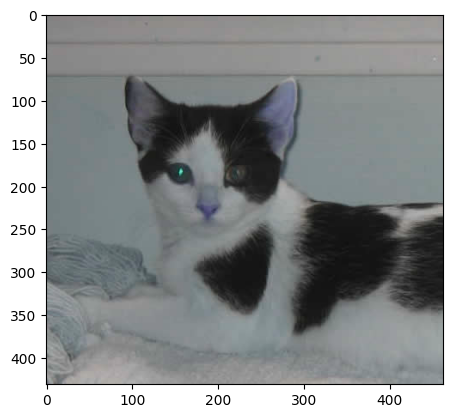

In [93]:
plt.imshow(test_img)

In [96]:
# Preprocess the image
test_img_resized = cv2.resize(test_img,(256,256))
test_input = test_img_resized.reshape((1,256,256,3))

# Make a prediction
prediction = model.predict(test_input)

# Print the prediction
if prediction[0][0] > 0.5:
    print("The image is predicted to be a Dog.")
else:
    print("The image is predicted to be a Cat.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
The image is predicted to be a Dog.


In [97]:
import random
# Select a random image path from the test set
random_test_image_path = random.choice(test_image_paths)
test_img = cv2.imread(random_test_image_path)

# Check if the image was loaded successfully
if test_img is None:
    print(f"Error: Could not load image from {random_test_image_path}")
else:
    print(f"Loaded image from: {random_test_image_path}")

Loaded image from: /content/PetImages/Dog/723.jpg


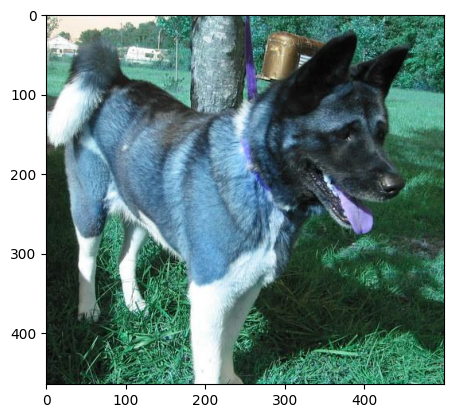

In [98]:
plt.imshow(test_img)

In [99]:
# Preprocess the image
test_img_resized = cv2.resize(test_img,(256,256))
test_input = test_img_resized.reshape((1,256,256,3))

# Make a prediction
prediction = model.predict(test_input)

# Print the prediction
if prediction[0][0] > 0.5:
    print("The image is predicted to be a Dog.")
else:
    print("The image is predicted to be a Cat.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
The image is predicted to be a Dog.


Data Augmentation

In [100]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,array_to_img

In [101]:
source_dir = '/content/Data Augmentation/Ai1.jpg'

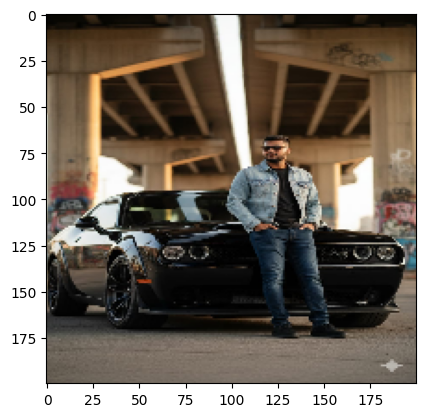

In [102]:
img = image.load_img(source_dir,target_size=(200,200))
import matplotlib.pyplot as plt
plt.imshow(img)

In [103]:
img,type(img)

(<PIL.Image.Image image mode=RGB size=200x200>, PIL.Image.Image)

In [104]:
data_gen = ImageDataGenerator(
    rotation_range=40,zoom_range = 0.2,height_shift_range=0.2,
    width_shift_range=0.2,vertical_flip=True,horizontal_flip=True,#fill_mode,reflect
    fill_mode='nearest'
)

In [105]:
img = img_to_array(img)
img.shape

(200, 200, 3)

In [106]:
input_batch = img.reshape(1,200,200,3)


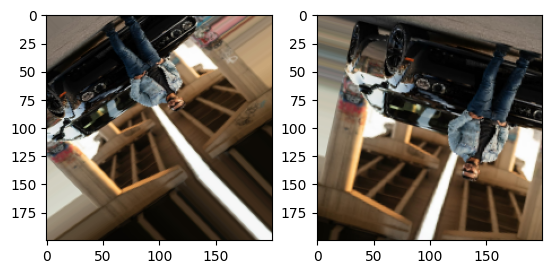

In [119]:
plt.subplot(1, 2, 1)
img = image.load_img('/content/aug/aug_image_0_1071.png',target_size=(200,200))
plt.imshow(img)
plt.subplot(1, 2, 2)
img = image.load_img('/content/aug/_0_7445.png',target_size=(200,200))
plt.imshow(img)

In [107]:
import os

# Create the directory if it doesn't exist
if not os.path.exists("/content/aug"):
    os.makedirs("/content/aug")

i = 0
for ouput in data_gen.flow(input_batch,batch_size = 1,save_to_dir="/content/aug"):
  #flow_from_directory when class is divided into folder
  i =i+1
  if i ==10:
    break

In [108]:
input_batch.shape

(1, 200, 200, 3)

In [109]:
import os
import matplotlib.pyplot as plt

#the directory if it doesn't exist
if not os.path.exists("/content/aug"):
    os.makedirs("/content/aug")

# an ImageDataGenerator with augmentation parameters
data_gen = ImageDataGenerator(
    rotation_range=40,
    zoom_range=0.2,
    height_shift_range=0.2,
    width_shift_range=0.2,
    vertical_flip=True,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Use the flow method to generate augmented images and save them
count = 0
for batch in data_gen.flow(input_batch, batch_size=1, save_to_dir="/content/aug", save_prefix="aug_image", save_format="png"):
    count += 1
    if count > 500: # Generate and save 500 augmented images as an example
        break

print(f"Generated and saved {count} augmented images to /content/aug")

Generated and saved 501 augmented images to /content/aug


# Create an ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,          
    rotation_range=20,      
    width_shift_range=0.2,   # Shift images horizontally by a random fraction
    height_shift_range=0.2,  # Shift images vertically by a random fraction
    shear_range=0.2,         # Apply shearing transformations
    zoom_range=0.2,          # Apply random zoom
    horizontal_flip=True,    # Flip images horizontally
    fill_mode='nearest'      # Fill in new pixels created by transformations
)

# Define the directory containing your image data
data_dir = '/content/Data Augmentation' # Assuming your images are in this directory

# Use flow_from_directory to generate batches of augmented images
augmented_data_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),  # Resize images to match your model input size
    batch_size=32,
    class_mode='binary'      # Or 'categorical' depending on your task
)

# You can now use 'augmented_data_generator' to train your model
# model.fit(augmented_data_generator, ...)